In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 1
$$W_s = 1.00$$
$$W_a = 0.00$$
$$W_u = 0.00$$

In [4]:
exp_s = 'exp1_(1,0,0)'

In [15]:
containers_data = {}
with open(f"./{exp_s}/containers.json") as file:
    for line in file:
        data = json.loads(line)
        cycle = data['cycle']
        insertion = {
            'nb_containers': data['nb_containers'], 
            'date' : data['date']['$date'],
            'cpu_util' : 0
        }
        for key,value in data.items():
            if key.startswith('economicmape_web_'):
                insertion['cpu_util'] += value['cpu_percent']
        containers_data[cycle] = insertion
containers = pd.DataFrame(containers_data).T

In [20]:
planning_data = {}
with open(f"./{exp_s}/planning.json") as file:
     for line in file:
            data = json.loads(line)
            cycle = data['cycle']
            data.pop('_id')
            data['date'] = data['date']['$date']
            planning_data[cycle] = data
planning = pd.DataFrame(planning_data).T

In [25]:
execution_data = {}
with open(f"./{exp_s}/execution.json") as file:
     for line in file:
            data = json.loads(line)
            cycle = data['cycle']
            data.pop('_id')
            data['date'] = data['date']['$date']
            execution_data[cycle] = data
execution = pd.DataFrame(execution_data).T

,nb_containers,date,cpu_util
0,6,2021-05-10T17:00:18.231Z,5.47035
1,7,2021-05-10T17:01:33.728Z,6.72587
2,8,2021-05-10T17:02:51.072Z,7.57209
3,9,2021-05-10T17:04:10.723Z,9.18065
4,10,2021-05-10T17:07:31.542Z,9.62445
...,...,...,...
1159,100,2021-05-14T16:29:12.944Z,52.5431
1160,100,2021-05-14T16:33:39.105Z,48.2289
1161,100,2021-05-14T16:39:27.781Z,64.2154
1162,100,2021-05-14T16:45:54.775Z,59.3655


In [27]:
planning.set_index('cycle',inplace=True)
execution.set_index('cycle',inplace=True)

In [28]:
planning.sort_values('cycle',inplace=True)
execution.sort_values('cycle',inplace=True)

In [38]:
execution = execution[~execution.index.duplicated(keep='first')]
planning['replicas']  =  execution['replicas']
planning['nb_containers'] = containers['nb_containers']
planning['cpu_util'] = containers['cpu_util']

In [39]:
exp1 = planning
exp1 = exp1.iloc[1:]

In [40]:

exp1['replicas'].unique()

array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 100, 90, 68, 71, 84, 77, 61, 46, 74, 80, 70, 94,
       53, 60, 73, 66, 55, 64, 52, 75, 72, 34, 63, 98, 44, 78, 87, 76, 81,
       40, 65, 42, 41, 51, 29, 30, 31, 32, 33, 35, 36, 37, 38, 79, 56, 57,
       91, 69, 99, 96, 97, 82, 62, 89, 59, 67, 86, 47, 95, 45, 49, 48, 54,
       39], dtype=object)

In [50]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date,replicas,nb_containers,cpu_util,W
cycle,,,,,,,,,,,,,
2,1000,100,7565.84,13.217,158.0,0.002103,197.108569,3.245394,2021-05-10T17:01:50.009Z,8,8,7.572094,197.108569
3,400,50,1889.01,26.469,158.0,0.001923,160.360402,3.892637,2021-05-10T17:03:09.755Z,9,9,9.180645,160.360402
4,300,30,5266.30,5.697,158.0,0.002115,305.079887,3.983387,2021-05-10T17:06:30.590Z,10,10,9.624455,305.079887
5,160,20,4230.12,4.728,158.0,0.002242,205.002008,3.462304,2021-05-10T17:07:53.976Z,11,11,10.072019,205.002008
6,100,10,3884.55,2.574,158.0,0.002313,232.079049,4.021815,2021-05-10T17:09:19.157Z,12,12,10.279590,232.079049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,160,20,5407.23,3.699,158.0,0.002115,313.244045,3.983387,2021-05-14T16:32:36.671Z,100,100,48.228890,313.244045
1161,100,10,3069.18,3.258,158.0,0.002144,136.021537,3.283941,2021-05-14T16:38:25.759Z,100,100,64.215397,136.021537
1162,100,20,2095.34,9.545,158.0,0.002319,117.437050,3.930661,2021-05-14T16:44:52.283Z,100,100,59.365470,117.437050


In [51]:
exp1['W'] = exp1['predicted_W']
exp1.fillna(method='ffill',inplace=True)

<ipython-input-51-9b65033746fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['W'] = exp1['predicted_W']
/home/nima/.local/lib/python3.8/site-packages/pandas/core/frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Number of containers

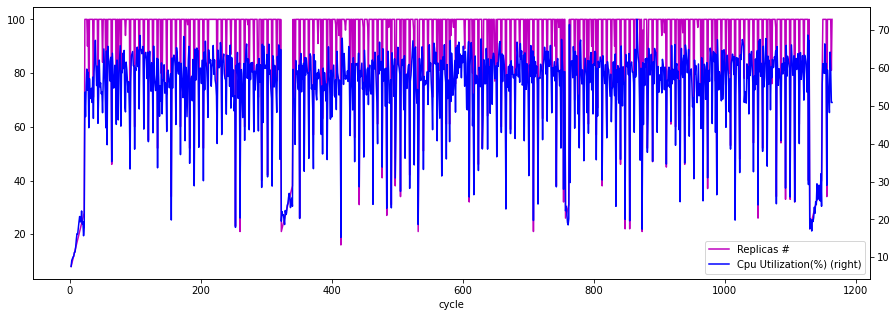

In [52]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['replicas'].plot(legend=True,label='Replicas #',color='m')
exp1['cpu_util'].plot(legend=True,label='Cpu Utilization(%)',secondary_y=True,color='b')
plt.xlabel('Cycle Number')
plt.savefig(f'{exp_s}/replicas_number.png')

## Response time vs. Arrival rate

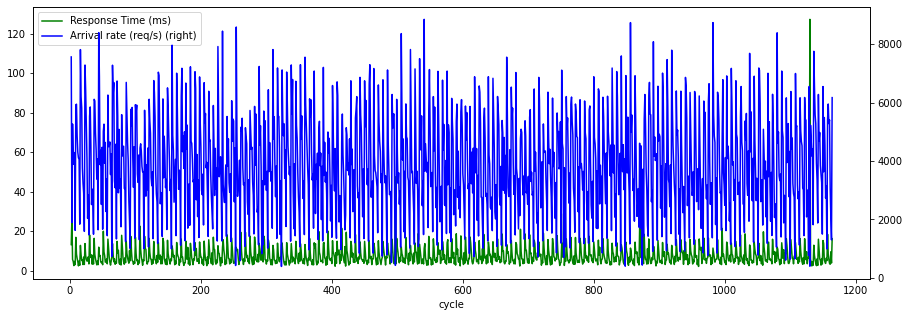

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
# ax.set_ylim(0,5000)
# ax.right_ax.set_ylim([0,150])

plt.savefig(f'{exp_s}/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

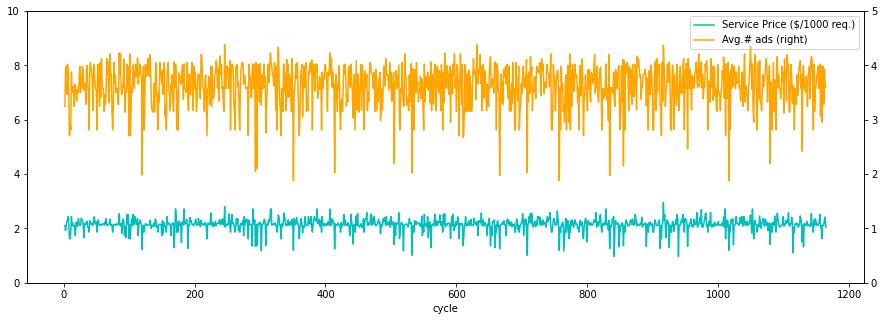

In [54]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig(f'{exp_s}/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [55]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

<ipython-input-55-634cab59c365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
<ipython-input-55-634cab59c365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
<ipython-input-55-634cab59c365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

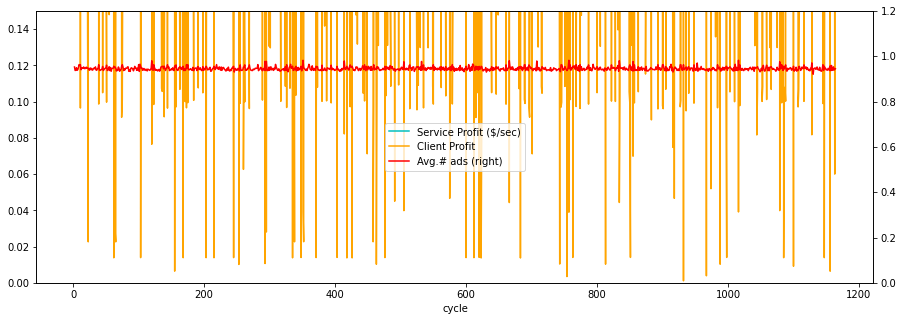

In [58]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig(f'{exp_s}/service_profit_vs_client_profit_user_satisfaction.png')